<a href="https://colab.research.google.com/github/DeepeshMadane/Machine-learning-/blob/main/employee_attrition_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn


In [2]:
df = pd.read_csv('watson_healthcare_modified.csv')

In [3]:
df.drop(['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeID'], axis = 1, inplace = True)
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,No,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Maternity,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Maternity,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Maternity,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Maternity,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [4]:
df['Shift'].value_counts()

Shift
0    708
1    684
2    185
3     99
Name: count, dtype: int64

In [5]:
#numerical columns
num_cols = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate',
            'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
            'PercentSalaryHike', 'Shift', 'TotalWorkingYears',
            'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
            'YearsSinceLastPromotion', 'YearsWithCurrManager']
#categorical columns
cat_cols = ['Attrition', 'BusinessTravel', 'Department',
             'Education', 'EducationField', 'EnvironmentSatisfaction',
             'Gender', 'JobInvolvement', 'JobLevel',
               'JobRole', 'JobSatisfaction', 'MaritalStatus',
                 'OverTime', 'PerformanceRating', 'RelationshipSatisfaction', 'WorkLifeBalance']


In [6]:
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1676.0,36.866348,9.129126,18.0,30.00,36.0,43.00,60.0
DailyRate,1676.0,800.557876,401.594438,102.0,465.00,796.5,1157.00,1499.0
DistanceFromHome,1676.0,9.221957,8.158118,1.0,2.00,7.0,14.00,29.0
HourlyRate,1676.0,65.470167,20.207572,30.0,48.00,65.5,83.00,100.0
MonthlyIncome,1676.0,6516.512530,4728.456618,1009.0,2928.25,4899.0,8380.25,19999.0
MonthlyRate,1676.0,14287.019690,7138.857783,2094.0,7993.00,14269.5,20462.00,26999.0
NumCompaniesWorked,1676.0,2.662291,2.477704,0.0,1.00,2.0,4.00,9.0
PercentSalaryHike,1676.0,15.196897,3.646550,11.0,12.00,14.0,18.00,25.0
Shift,1676.0,0.806086,0.855527,0.0,0.00,1.0,1.00,3.0
TotalWorkingYears,1676.0,11.338902,7.834996,0.0,6.00,10.0,15.00,40.0


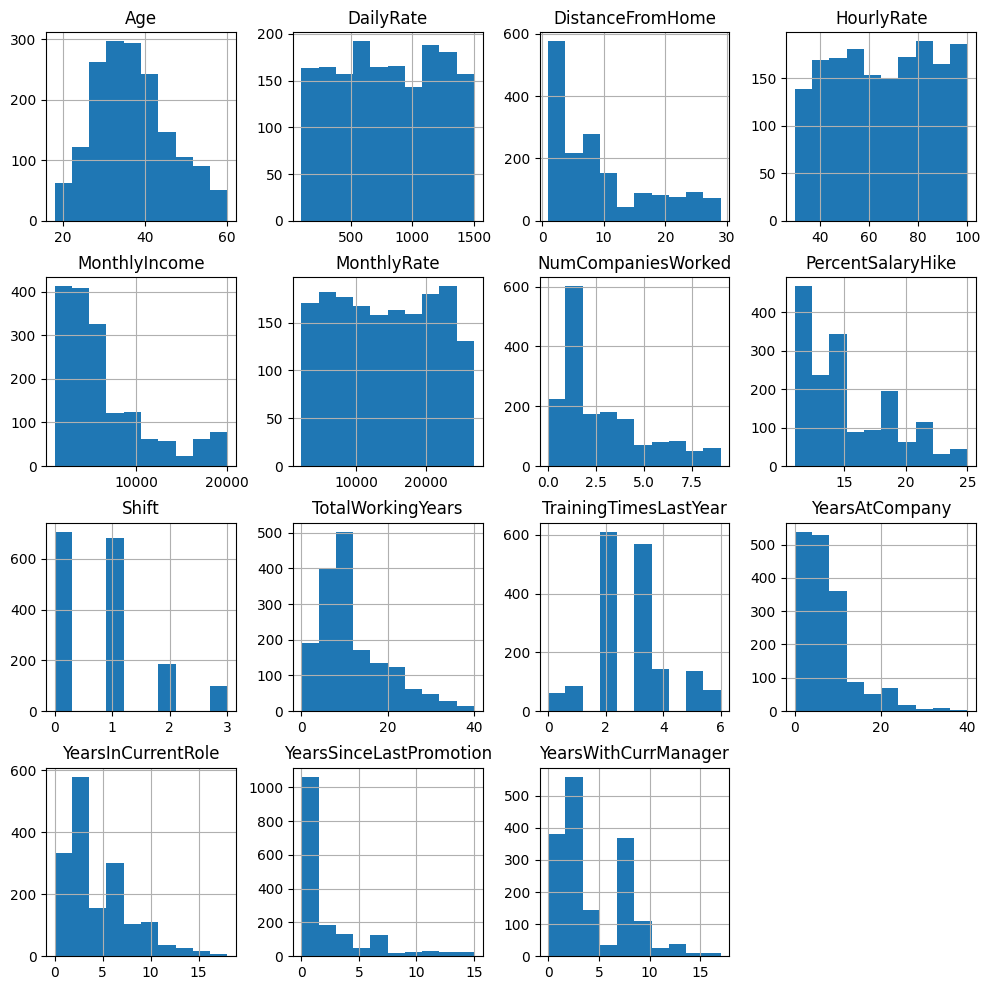

In [8]:
df[num_cols].hist(figsize=(12,12))
plt.show()

In [9]:
for i in cat_cols:
    print(str(df[i].value_counts(normalize = True) * 100) + ' %')

    print('-' * 40)

Attrition
No     88.126492
Yes    11.873508
Name: proportion, dtype: float64 %
----------------------------------------
BusinessTravel
Travel_Rarely        70.644391
Travel_Frequently    19.093079
Non-Travel           10.262530
Name: proportion, dtype: float64 %
----------------------------------------
Department
Maternity     47.494033
Cardiology    31.682578
Neurology     20.823389
Name: proportion, dtype: float64 %
----------------------------------------
Education
3    39.081146
4    26.670644
2    19.212411
1    11.694511
5     3.341289
Name: proportion, dtype: float64 %
----------------------------------------
EducationField
Life Sciences       41.587112
Medical             31.264916
Marketing           11.276850
Technical Degree     8.890215
Other                5.250597
Human Resources      1.730310
Name: proportion, dtype: float64 %
----------------------------------------
EnvironmentSatisfaction
3    30.548926
4    30.310263
1    19.689737
2    19.451074
Name: proportion, dty

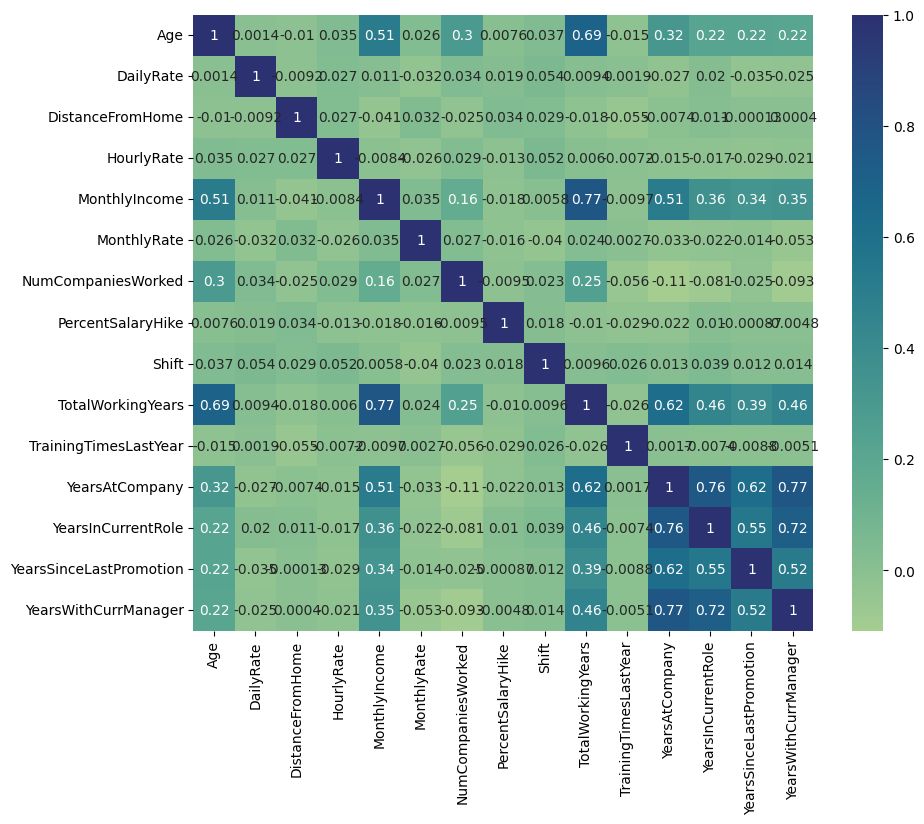

In [12]:
import seaborn as sns
plt.figure(figsize = (10,8))
sns.heatmap(df[num_cols].corr(), annot = True, cmap = 'crest')

plt.show()

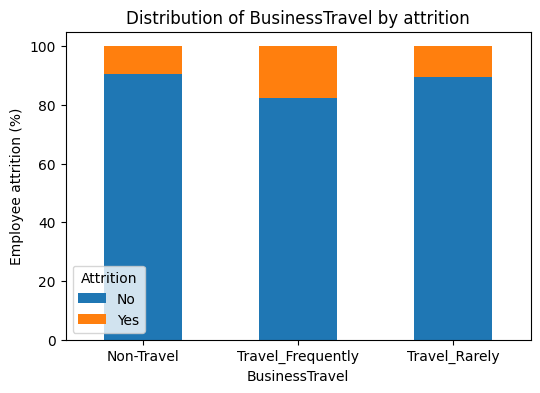

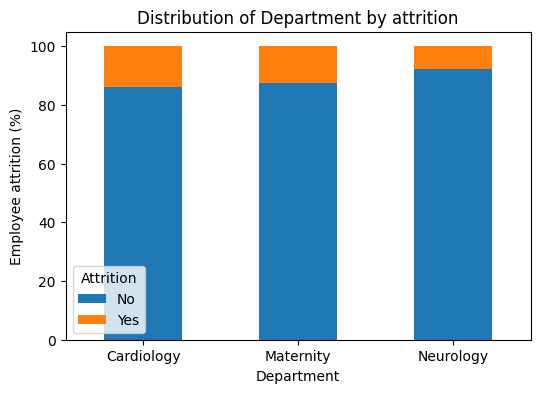

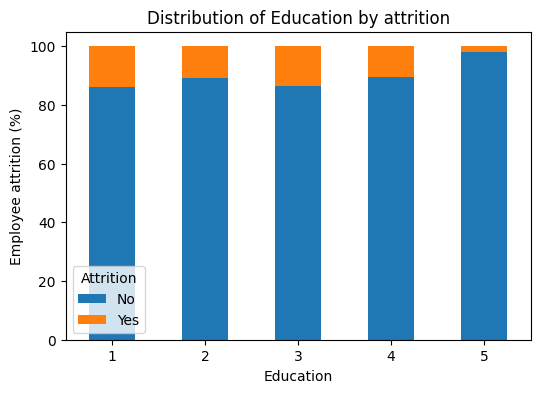

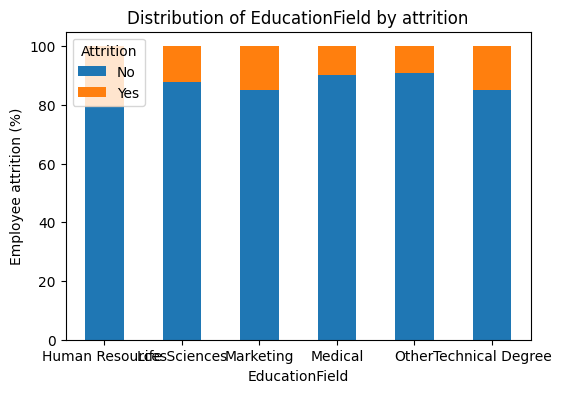

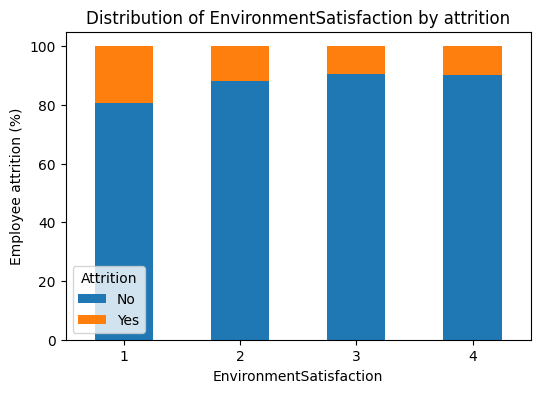

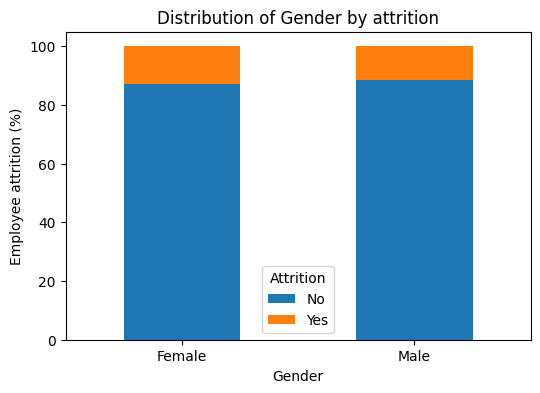

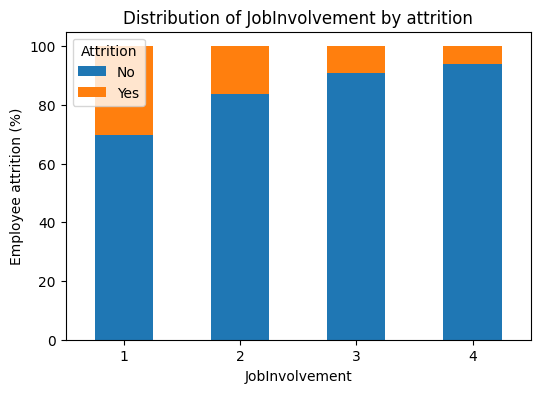

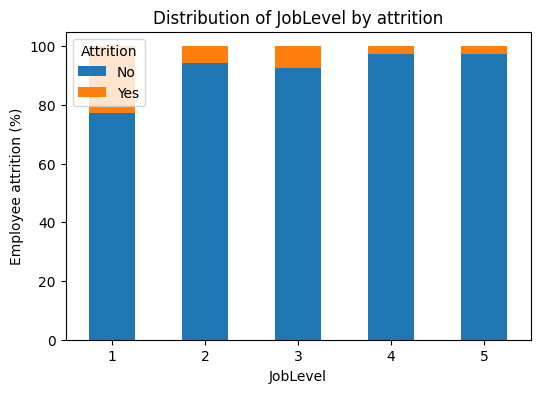

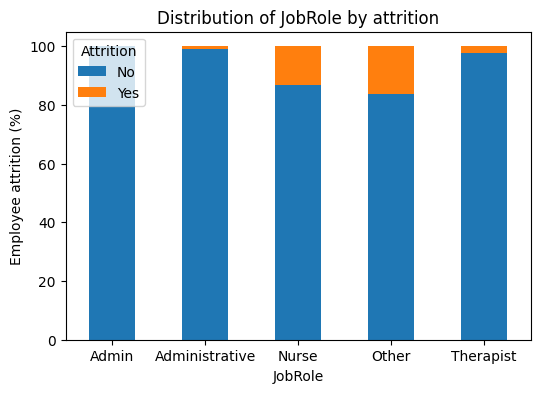

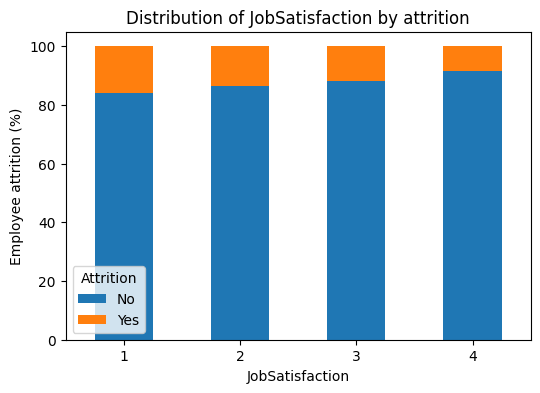

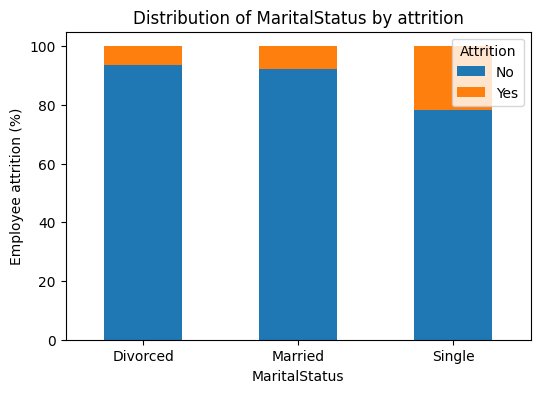

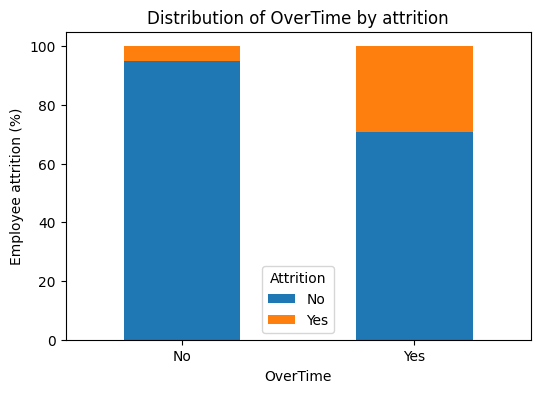

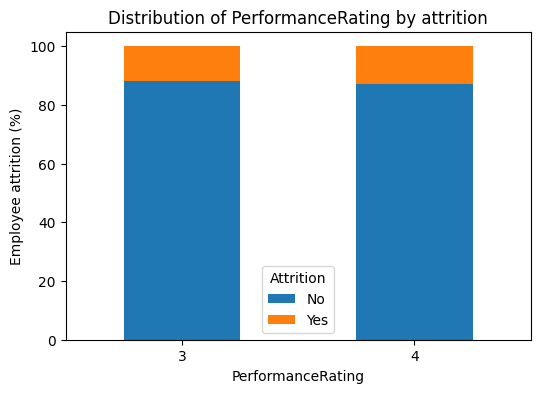

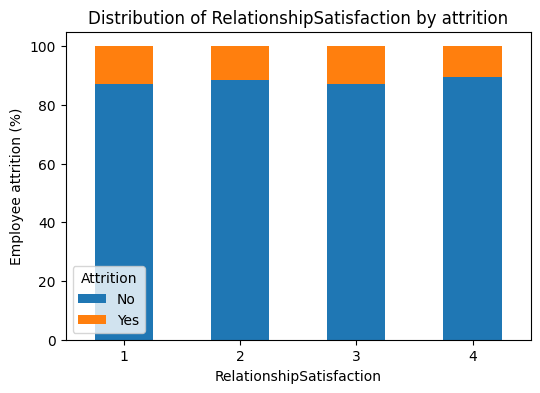

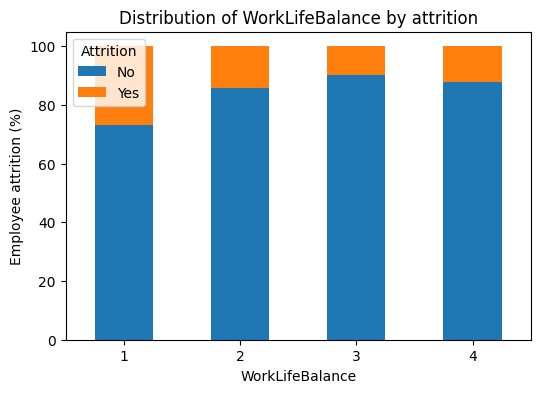

In [13]:
for i in cat_cols:
    if i != 'Attrition':
        fig, ax = plt.subplots(figsize = (6,4))
        crosstab = pd.crosstab(df[i], df['Attrition'], normalize = 'index') * 100
        crosstab.plot(kind = 'bar', stacked = True, ax = ax)
        ax.set_ylabel('Employee attrition (%)')
        ax.tick_params(axis = 'x', rotation = 0)
        ax.set_title(f'Distribution of {i} by attrition')

        plt.show()

In [14]:
df.groupby(['Attrition'])[num_cols].mean().T

Attrition,No,Yes
Age,37.670278,30.899497
DailyRate,808.499661,741.613065
DistanceFromHome,8.905890,11.567839
HourlyRate,65.739336,63.472362
MonthlyIncome,6852.301963,4024.246231
MonthlyRate,14167.187542,15176.427136
NumCompaniesWorked,2.646581,2.778894
PercentSalaryHike,15.192959,15.226131
Shift,0.855789,0.437186
TotalWorkingYears,12.012187,6.341709


In [15]:
#create dummy variables for some categorical variables
dummy_vars = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']

overtime = {'Yes': 1, 'No': 0}
attrition = {'Yes': 1, 'No': 0}

df = pd.get_dummies(data = df, columns =dummy_vars, drop_first= True)
df['OverTime'] = df.OverTime.map(overtime)
df['Attrition'] = df.Attrition.map(attrition)

In [16]:
#separate target variable (Attrition) and independent variables
y = df['Attrition']
X = df.drop('Attrition', axis = 1)

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_scaled = sc.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns = X.columns)


In [19]:
#split the training and test data following 70/30 role and stratify the imbalanced dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 42, stratify = y)

In [20]:
# prompt: make a fumction to try all classification model

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def try_all_models(X_train, X_test, y_train, y_test):
    models = {
        "Logistic Regression": LogisticRegression(),
        "K-Nearest Neighbors": KNeighborsClassifier(),
        "Support Vector Machine": SVC(),
        "Decision Tree": DecisionTreeClassifier(),
        "Random Forest": RandomForestClassifier(),
        "Gradient Boosting": GradientBoostingClassifier(),
        "XGBoost": XGBClassifier()
    }

    results = {}

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        results[name] = {
            "Accuracy": accuracy_score(y_test, y_pred),
            "Precision": precision_score(y_test, y_pred),
            "Recall": recall_score(y_test, y_pred),
            "F1-Score": f1_score(y_test, y_pred)
        }

    return results


In [22]:
# prompt: print  in better way

results = try_all_models(X_train, X_test, y_train, y_test)

# Print results in a more organized way
for name, metrics in results.items():
  print(f"**{name}**")
  for metric, value in metrics.items():
    print(f"  {metric}: {value:.4f}")
  print("\n")


**Logistic Regression**
  Accuracy: 0.9284
  Precision: 0.7609
  Recall: 0.5833
  F1-Score: 0.6604


**K-Nearest Neighbors**
  Accuracy: 0.8887
  Precision: 0.6111
  Recall: 0.1833
  F1-Score: 0.2821


**Support Vector Machine**
  Accuracy: 0.9185
  Precision: 0.8276
  Recall: 0.4000
  F1-Score: 0.5393


**Decision Tree**
  Accuracy: 0.8648
  Precision: 0.4167
  Recall: 0.3333
  F1-Score: 0.3704


**Random Forest**
  Accuracy: 0.9125
  Precision: 0.8077
  Recall: 0.3500
  F1-Score: 0.4884


**Gradient Boosting**
  Accuracy: 0.9185
  Precision: 0.7568
  Recall: 0.4667
  F1-Score: 0.5773


**XGBoost**
  Accuracy: 0.9125
  Precision: 0.6905
  Recall: 0.4833
  F1-Score: 0.5686




In [23]:
# prompt: best model is logistic regression use gridsearchcv for hyper parameter tuning

from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Create a logistic regression model
logreg = LogisticRegression()

# Create a GridSearchCV object
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best parameters:", grid_search.best_params_)

# Get the best model
best_logreg = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_logreg.predict(X_test)

# Evaluate the best model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Best parameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy: 0.9244532803180915
Precision: 0.7391304347826086
Recall: 0.5666666666666667
F1-Score: 0.6415094339622641


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
